# Problem(a)

In [1]:
# -*- coding: utf-8 -*-
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

## Computer Tech

In [2]:
c1_graphics = ['comp.graphics']
c1_misc = ['comp.os.ms-windows.misc']
c1_pc = ['comp.sys.ibm.pc.hardware']
c1_mac = ['comp.sys.mac.hardware']
c1_graphics_train = fetch_20newsgroups(subset = 'train', categories = c1_graphics, shuffle=True, random_state=42)
c1_misc_train = fetch_20newsgroups(subset = 'train', categories = c1_misc, shuffle=True, random_state=42)
c1_pc_train = fetch_20newsgroups(subset = 'train', categories = c1_pc, shuffle=True, random_state=42)
c1_mac_train = fetch_20newsgroups(subset = 'train', categories = c1_mac, shuffle=True, random_state=42)

## Recreational Activity


In [3]:
c2_autos = ['rec.autos']
c2_motocycle = ['rec.motorcycles']
c2_baseball = ['rec.sport.baseball']
c2_hockey = ['rec.sport.hockey']
c2_autos_train = fetch_20newsgroups(subset = 'train', categories = c2_autos, shuffle=True, random_state=42)
c2_motocycle_train = fetch_20newsgroups(subset = 'train', categories = c2_motocycle, shuffle=True, random_state=42)
c2_baseball_train = fetch_20newsgroups(subset = 'train', categories = c2_baseball, shuffle=True, random_state=42)
c2_hockey_train = fetch_20newsgroups(subset = 'train', categories = c2_hockey, shuffle=True, random_state=42)

## Histogram of per topic

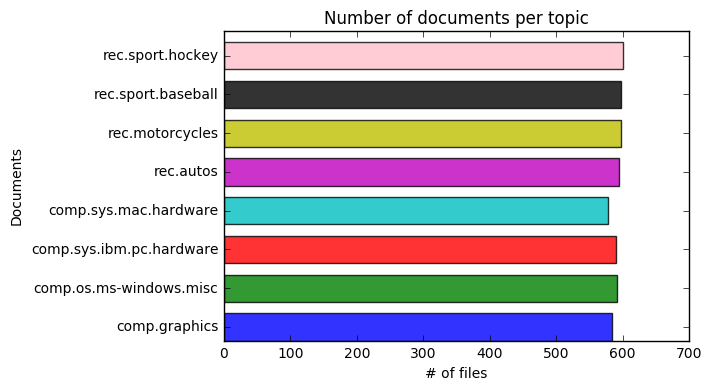

In [109]:
values = []
values = (len(c1_graphics_train.data), len(c1_misc_train.data),  len(c1_pc_train.data), len(c1_mac_train.data), len(c2_autos_train.data), len(c2_motocycle_train.data), len(c2_baseball_train.data), len(c2_hockey_train.data))
index = np.arange(8)
bar_width = 0.7
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
bars = plt.barh(index, values, bar_width,alpha = 0.8, color = color)
plt.xlabel("# of files")
plt.ylabel('Documents')
plt.title('Number of documents per topic')
plt.yticks(index + bar_width/2, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
plt.xlim(0,700)
plt.legend()
plt.show()

# Problem(b)

In [5]:
from sklearn.feature_extraction import text
import re
import nltk 
import string

## Define a tokenizer

In [6]:
stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenizer_fun(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    return stem

from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

from sklearn.feature_extraction.text import TfidfVectorizer
TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
TFxIDF_data = TFxIDF.fit_transform(all_data.data)

## Terms we extracted based on our tokenizer function

In [7]:
print TFxIDF_data.shape

(18846, 72399)


# Problem(c)

## Report 10 most significant terms

In [8]:
my_list=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

for category in my_list:
    categories = [category]
    sub_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, max_features=10, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
    sub_count = TFxIDF_sub.fit_transform(sub_data.data)
    print (TFxIDF_sub.vocabulary_.keys())

[u'drive', u'problem', u'disk', u'work', u'card', u'mb', u'ani', u'scsi', u'use', u'control']
[u'ani', u'drive', u'know', u'like', u'problem', u'work', u'use', u'mac', u'appl', u'monitor']
[u'new', u'offer', u'drive', u'ship', u'sale', u'sell', u'includ', u'price', u'pleas', u'use']
[u'peopl', u'say', u'believ', u'church', u'jesus', u'think', u'god', u'christian', u'sin', u'know']


# Problem(d)

## LSI on TDxIDF

In [9]:
from sklearn.decomposition import TruncatedSVD
X = TruncatedSVD(n_components=50, algorithm='arpack')
LSI = X.fit_transform(TFxIDF_data)

In [10]:
print LSI.shape

(18846L, 50L)


# Problem(e)

Linear Support Vector Machines

In [11]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

def data_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

### Construct a training set

In [111]:
train_LSI = LSI_fun('train')
train_set = data_fun('train')
# separate into two groups(Computer Tech & Recreation)
train_target_group = [ int(x / 4) for x in train_set.target]

In [113]:
print len(train_target_group)

4154


### Build a SVM classifier

In [13]:
from sklearn import svm
lin_svc = svm.LinearSVC()
lin_svc.fit(train_LSI, train_target_group)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Construct a testing set

In [14]:
test_LSI = LSI_fun('test')
test_set = data_fun('test')
test_target_group = [ int(x / 4) for x in test_set.target]
svm_predicted = lin_svc.predict(test_LSI)
print test_target_group[0:40]-svm_predicted[0:40]
y_score = lin_svc.fit(train_LSI, train_target_group).decision_function(test_LSI)

[ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]


In [15]:
print y_score[0:20]
print y_score.shape, svm_predicted.shape

[ 0.52663027 -2.3365168   0.5144036  -1.10996919 -4.19977892  1.5929596
  0.51804129 -3.18772369 -0.58821883  0.68414229  0.21751899  1.00822341
  3.27310396  0.48167488  0.35646751  1.51483024  0.77646524  0.90276238
 -1.16861254  1.7118371 ]
(2765L,) (2765L,)


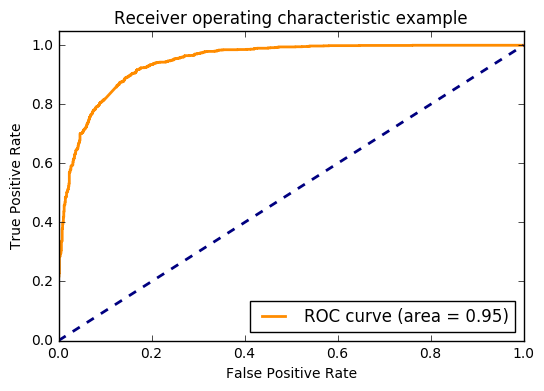

In [16]:
y_score_test = lin_svc.decision_function(test_LSI)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 863  312]
 [  64 1526]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.04  0.96]]


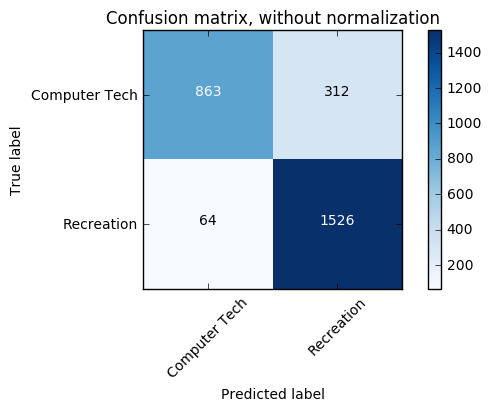

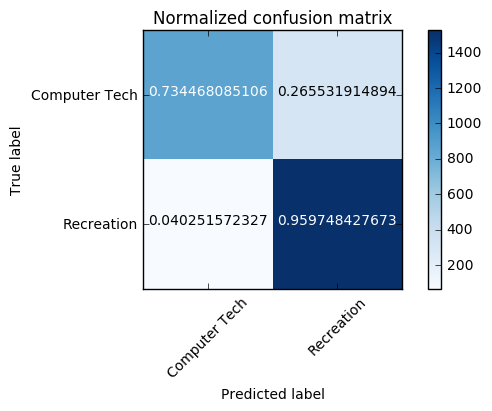

In [17]:
svm_predicted = lin_svc.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Linear SVM---Accuracy, Recall and Precision

In [18]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(test_target_group, svm_predicted)
print (svm_accuracy)

0.864014466546


In [19]:
from sklearn.metrics import recall_score
svm_recall_score = recall_score(test_target_group, svm_predicted)
print (svm_recall_score)

0.959748427673


In [20]:
from sklearn.metrics import precision_score
svm_precision_score = precision_score(test_target_group, svm_predicted)
print (svm_precision_score)

0.830250272035


# Problem(f)
soft margin SVM

### Split the data into 5 fold

In [21]:
from sklearn.cross_validation import KFold
kf = KFold(len(train_target_group), n_folds=5,shuffle=True,random_state=42)

In [22]:
print kf

sklearn.cross_validation.KFold(n=4154, n_folds=5, shuffle=True, random_state=42)


### Build 5*7 SVM classifiers

In [23]:
from sklearn import svm
matrix = [[0]*7 for i in range(5)]
i = 0
j = 0

for train_index, test_index in kf:
    X_train, X_test = train_LSI[train_index], train_LSI[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        X_train_target_group = [ int(x / 4) for x in train_set.target[train_index]]
        X_test_target_group = [ int(x / 4) for x in train_set.target[test_index]]
        
        soft_svm_clf = svm.LinearSVC(C=10**k)
        soft_svm_clf.fit(X_train, X_train_target_group)
        score = soft_svm_clf.score(X_test, X_test_target_group)
        matrix[i][j]=score
        j=j+1
    i=i+1
    j=0

In [24]:
import numpy as np
avg_value = np.array(matrix)
print avg_value.shape

(5L, 7L)


In [25]:
max = 0
max_index = 0
for i in range (7):
    mean = np.mean(avg_value[:,i:i+1])
    if max < mean:
        max = mean
        max_index = i
print max, max_index
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**-penalty[max_index])   

0.944149739753 5
('The best penalty value is', 0.01)


In [26]:
from sklearn import svm
soft_svc = svm.LinearSVC(C=10**-2)
soft_svc.fit(train_LSI, train_target_group)
soft_svc_predicted = soft_svc.predict(test_LSI)
score = soft_svc.score(test_LSI, test_target_group)
print (score)

0.830018083183


### Soft_SVM Confusion Matrix

Confusion matrix, without normalization
[[ 709  466]
 [   4 1586]]
Normalized confusion matrix
[[ 0.6  0.4]
 [ 0.   1. ]]


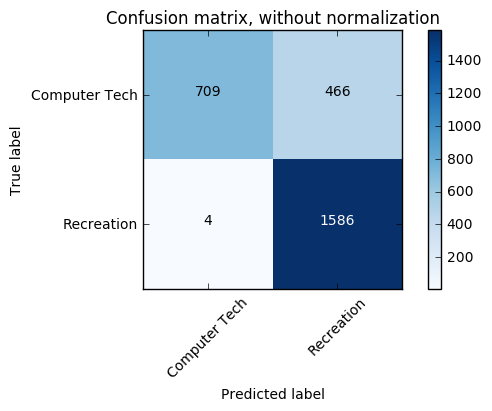

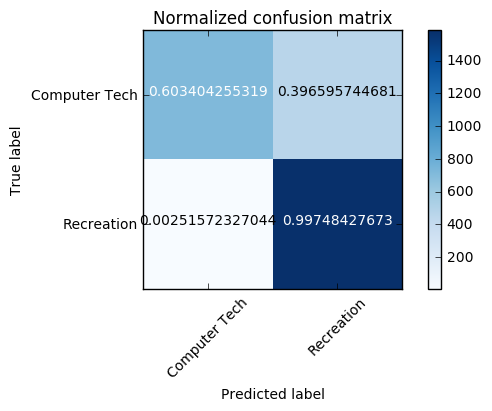

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, soft_svc_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Soft Margin SVM---Accuracy, Recall and Precision

In [28]:
from sklearn.metrics import accuracy_score
soft_svc_accuracy = accuracy_score(test_target_group, soft_svc_predicted)
print (soft_svc_accuracy)

0.830018083183


In [29]:
from sklearn.metrics import precision_score
soft_svc_precision_score = precision_score(test_target_group, soft_svc_predicted)
print (soft_svc_precision_score)

0.772904483431


In [30]:
from sklearn.metrics import recall_score
soft_svc_recall_score = recall_score(test_target_group, soft_svc_predicted)
print (soft_svc_recall_score)

0.99748427673


# Problem(g)
Naive Bayes algorithm

In [63]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(train_LSI, train_target_group)
nb_predicted = nb_clf.predict(test_LSI)

In [64]:
y_score_test_nb = nb_clf.predict(test_LSI)
print(y_score_test_nb.shape)
print(y_score_test_nb[0:10])

(2765L,)
[1 0 1 0 0 0 1 0 0 1]


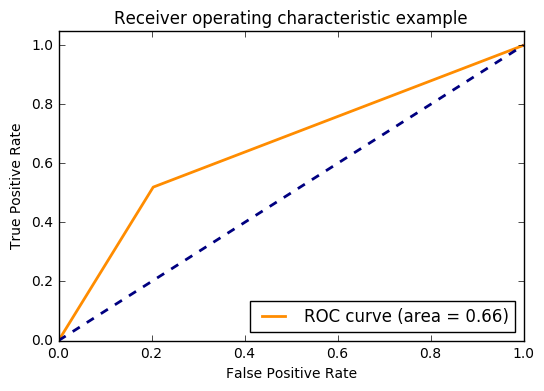

In [65]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[936 239]
 [764 826]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.48  0.52]]


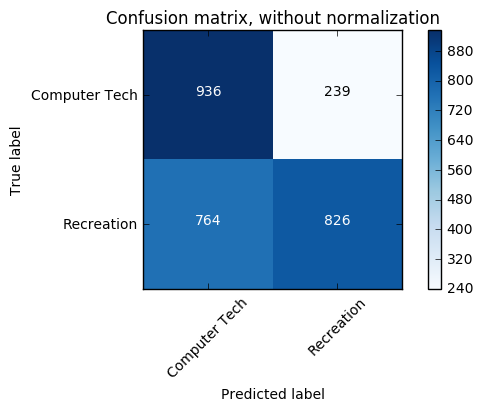

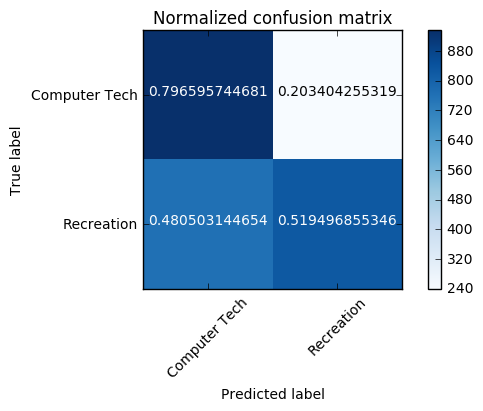

In [66]:
nb_predicted = nb_clf.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Naive Bayes---Accuracy, Recall and Precision

In [67]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(test_target_group, nb_predicted)
print (nb_accuracy)

0.637251356239


In [68]:
from sklearn.metrics import recall_score
nb_recall_score = recall_score(test_target_group, nb_predicted)
print (nb_recall_score)

0.519496855346


In [69]:
from sklearn.metrics import precision_score
nb_precision_score = precision_score(test_target_group, nb_predicted)
print (nb_precision_score)

0.77558685446


# Problem(h) && Problem(i)
h --- l-2 norm
i --- l-1 norm

## l-2 norm Logistic Regression

In [70]:
from sklearn import linear_model, datasets
lr_norm2 = linear_model.LogisticRegression()
lr_norm2.fit(train_LSI, train_target_group)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

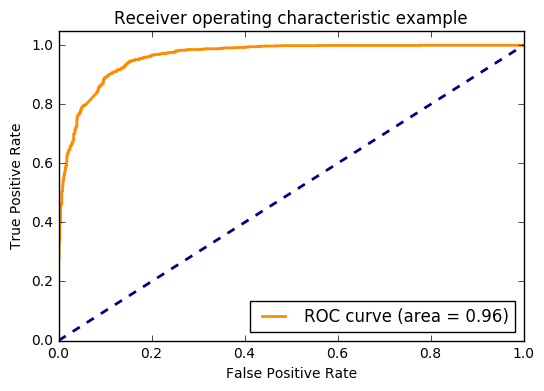

In [71]:
y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 879  296]
 [  31 1559]]
Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.02  0.98]]


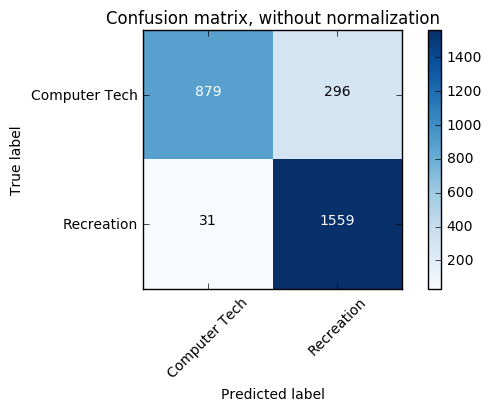

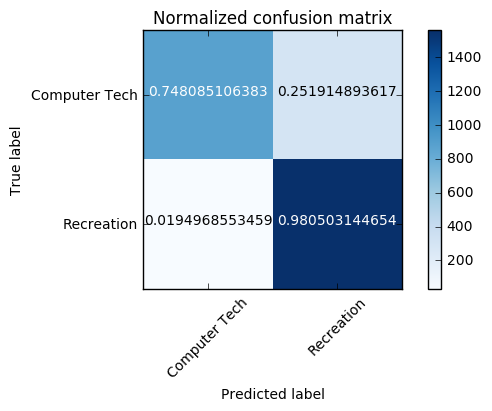

In [72]:
lr_norm2_predicted = lr_norm2.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, lr_norm2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression l-2 norm---Accuracy, Recall and Precision

In [73]:
from sklearn.metrics import accuracy_score
lr_norm2_accuracy = accuracy_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_accuracy)

0.881735985533


In [74]:
from sklearn.metrics import recall_score
lr_norm2_recall_score = recall_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_recall_score)

0.980503144654


In [75]:
from sklearn.metrics import precision_score
lr_norm2_precision_score = precision_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_precision_score)

0.840431266846


In [76]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm2 = linear_model.LogisticRegression(C = c)
    lr_norm2.fit(train_LSI, train_target_group)
    lr_norm2_predicted = lr_norm2.predict(test_LSI)
    y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
    print "coef:", c
    print y_score_test_lr_norm2
    print confusion_matrix(test_target_group, lr_norm2_predicted)

coef: 0.01
[ 0.29  0.11  0.31 ...,  0.35  0.37  0.33]
[[  51 1124]
 [   0 1590]]
coef: 0.1
[ 0.45 -0.73  0.52 ...,  0.81  0.85  0.67]
[[ 742  433]
 [   5 1585]]
coef: 1
[ 0.83 -2.89  0.92 ...,  1.72  1.66  1.49]
[[ 879  296]
 [  31 1559]]
coef: 10
[ 1.58 -6.76  1.41 ...,  3.08  2.86  2.93]
[[ 875  300]
 [  60 1530]]
coef: 100
[  3.1  -12.97   2.25 ...,   4.96   4.82   5.34]
[[ 859  316]
 [  77 1513]]
coef: 1000
[  4.43 -18.03   3.31 ...,   6.45   6.48   7.22]
[[ 847  328]
 [  97 1493]]
coef: 10000
[  4.7  -19.15   3.97 ...,   7.13   7.18   7.56]
[[ 849  326]
 [ 116 1474]]


## l-1 norm Logistic Regression

In [77]:
from sklearn import linear_model, datasets
lr_norm1 = linear_model.LogisticRegression(penalty = 'l1')
lr_norm1.fit(train_LSI, train_target_group)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

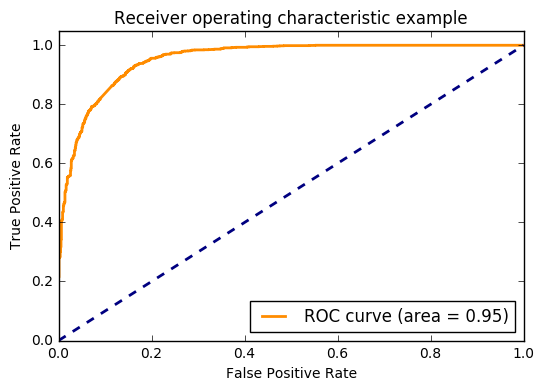

In [78]:
y_score_test_lr_norm1 = lr_norm1.decision_function(test_LSI)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 979  196]
 [ 108 1482]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.07  0.93]]


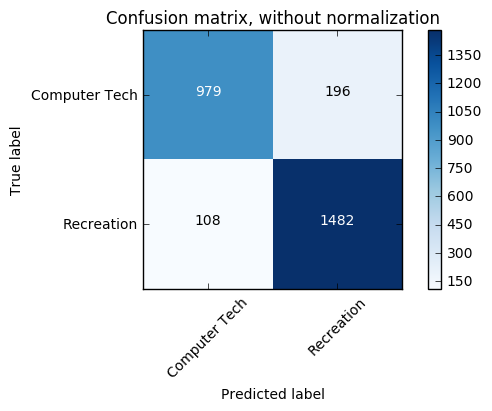

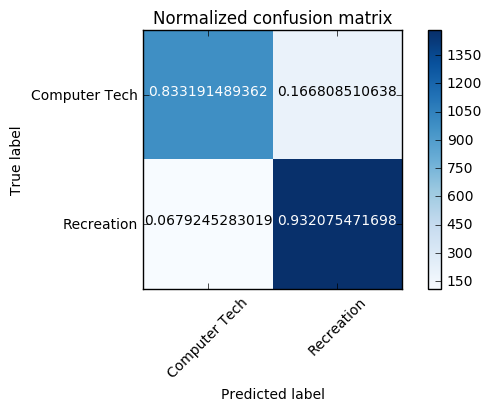

In [79]:
lr_norm1_predicted = lr_norm1.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, lr_norm1_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression l-1 norm---Accuracy, Recall and Precision

In [97]:
from sklearn.metrics import accuracy_score
lr_norm1_accuracy = accuracy_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_accuracy)

0.840144665461


In [98]:
from sklearn.metrics import recall_score
lr_norm1_recall_score = recall_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_recall_score)

0.927044025157


In [99]:
from sklearn.metrics import precision_score
lr_norm1_precision_score = precision_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_precision_score)

0.818888888889


In [80]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm1 = linear_model.LogisticRegression(C = c)
    lr_norm1.fit(train_LSI, train_target_group)
    lr_norm1_predicted = lr_norm1.predict(test_LSI)
    y_score_test_lr_norm1 = lr_norm1.decision_function(test_LSI)
    print "coef:", c
    print y_score_test_lr_norm1
    print confusion_matrix(test_target_group, lr_norm1_predicted)

coef: 0.01
[ 0.29  0.11  0.31 ...,  0.35  0.37  0.33]
[[  51 1124]
 [   0 1590]]
coef: 0.1
[ 0.45 -0.73  0.52 ...,  0.81  0.85  0.67]
[[ 742  433]
 [   5 1585]]
coef: 1
[ 0.83 -2.89  0.92 ...,  1.72  1.66  1.49]
[[ 879  296]
 [  31 1559]]
coef: 10
[ 1.58 -6.76  1.41 ...,  3.08  2.86  2.93]
[[ 875  300]
 [  60 1530]]
coef: 100
[  3.1  -12.97   2.25 ...,   4.96   4.82   5.34]
[[ 859  316]
 [  77 1513]]
coef: 1000
[  4.43 -18.03   3.31 ...,   6.45   6.48   7.22]
[[ 847  328]
 [  97 1493]]
coef: 10000
[  4.7  -19.15   3.97 ...,   7.13   7.18   7.56]
[[ 849  326]
 [ 116 1474]]


# Problem(j)

In [81]:
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

In [82]:
def data_i(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_i(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

In [83]:
train_LSI_i = LSI_i('train')
test_LSI_i  = LSI_i('test')
train_set_i = data_i('train')
test_set_i  = data_i('test')

In [101]:
train_i_target_group = [ int(x / 4) for x in train_set_i.target]
test_i_target_group = [ int(x / 4) for x in test_set_i.target]

In [84]:
print train_set_i.target
print train_set_i.target.shape

[3 2 0 ..., 1 1 1]
(2352L,)


## Naive Bayes classification

In [85]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB().fit(train_LSI_i, train_set_i.target)

In [86]:
nb_predicted = nb_clf.predict(test_LSI_i)
print nb_predicted.shape, 

(1565L,)


Confusion matrix, without normalization
[[137 161  72  22]
 [109 127 105  44]
 [ 79  45 204  62]
 [ 97  18  56 227]]
(4L, 4L)
Normalized confusion matrix
[[ 0.35  0.41  0.18  0.06]
 [ 0.28  0.33  0.27  0.11]
 [ 0.2   0.12  0.52  0.16]
 [ 0.24  0.05  0.14  0.57]]
(4L, 4L)


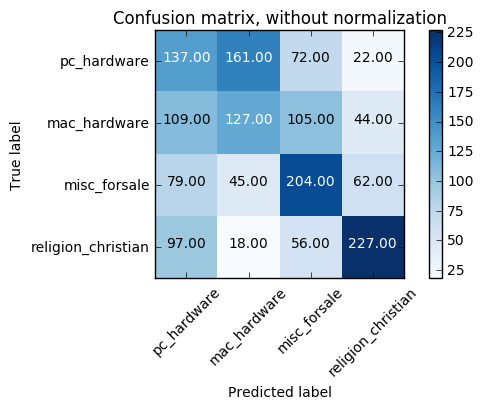

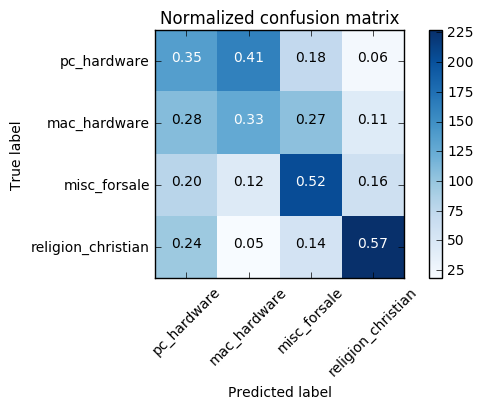

In [87]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print cm.shape
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [88]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(test_set_i.target, nb_predicted)
print (nb_accuracy)

0.444089456869


In [89]:
from sklearn.metrics import recall_score
nb_recall_score = recall_score(test_set_i.target, nb_predicted,average='weighted')
print (nb_recall_score)

0.444089456869


In [90]:
from sklearn.metrics import precision_score
nb_precision_score = precision_score(test_set_i.target, nb_predicted,average='weighted')
print (nb_precision_score)

0.449276631965


## Multiclass SVM classification

### One VS One

In [91]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

ovo_svc = OneVsOneClassifier(LinearSVC(C=100, random_state=42)).fit(train_LSI_i, train_set_i.target)

In [92]:
ovo_predicted = ovo_svc.predict(test_LSI_i)
print ovo_svc.predict(test_LSI_i)

[3 0 1 ..., 0 2 3]


Confusion matrix, without normalization
[[146 189  53   4]
 [133 112 123  17]
 [ 41  56 283  10]
 [  8  22  11 357]]
(4L, 4L)
Normalized confusion matrix
[[ 0.37  0.48  0.14  0.01]
 [ 0.35  0.29  0.32  0.04]
 [ 0.11  0.14  0.73  0.03]
 [ 0.02  0.06  0.03  0.9 ]]
(4L, 4L)


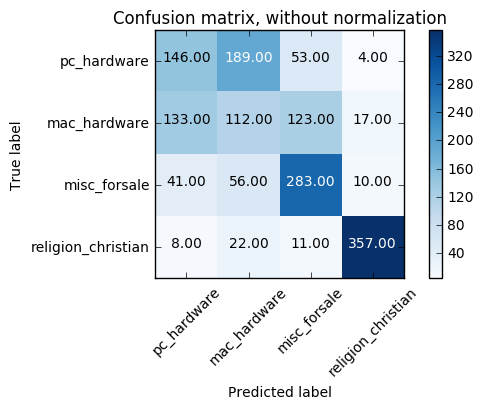

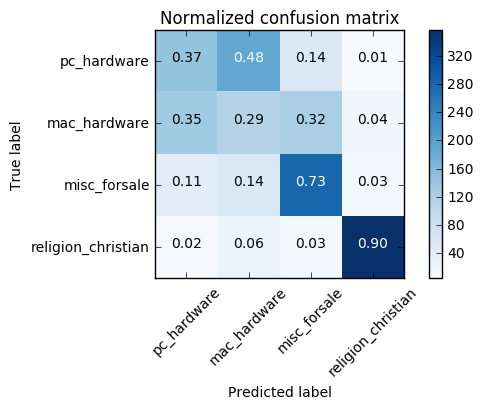

In [93]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print cm.shape
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovo_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [105]:
from sklearn.metrics import accuracy_score
ovo_predicted_predicted_accuracy = accuracy_score(test_i_target_group, ovo_predicted)
print (ovo_predicted_predicted_accuracy)

0.209584664537


In [107]:
from sklearn.metrics import recall_score
ovo_predicted_recall_score = recall_score(test_set_i.target, ovo_predicted,average='weighted')
print (ovo_predicted_recall_score)

0.573801916933


In [108]:
from sklearn.metrics import precision_score
ovo_predicted_precision_score = precision_score(test_set_i.target, ovo_predicted,average='weighted')
print (ovo_predicted_precision_score)

0.568237514448


### One VS Rest

In [94]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr_svc = OneVsRestClassifier(LinearSVC(C=1000, random_state=42)).fit(train_LSI_i, train_set_i.target)

In [95]:
ovr_predicted = ovr_svc.predict(test_LSI_i)
print ovr_svc.predict(test_LSI_i)

[3 0 0 ..., 0 2 3]


Confusion matrix, without normalization
[[197 172   4  19]
 [222 106  11  46]
 [124  60 183  23]
 [ 26   4   0 368]]
(4L, 4L)
Normalized confusion matrix
[[ 0.5   0.44  0.01  0.05]
 [ 0.58  0.28  0.03  0.12]
 [ 0.32  0.15  0.47  0.06]
 [ 0.07  0.01  0.    0.92]]
(4L, 4L)


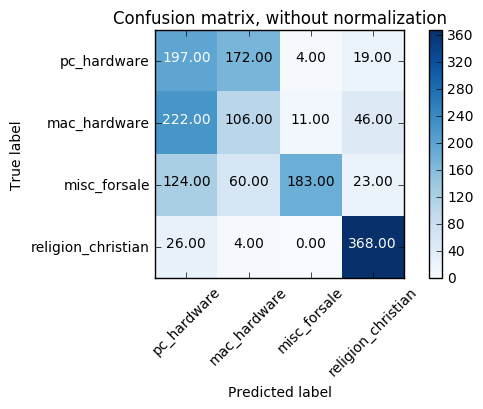

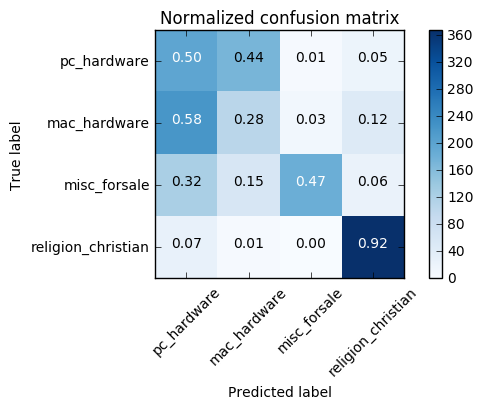

In [96]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print cm.shape
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovr_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## One VS Rest Multiclass SVM---Accuracy, Recall and Precision

In [102]:
from sklearn.metrics import accuracy_score
ovr_predicted_accuracy = accuracy_score(test_i_target_group, ovr_predicted)
print (ovr_predicted_accuracy)

0.36357827476


In [103]:
from sklearn.metrics import recall_score
ovr_predicted_recall_score = recall_score(test_set_i.target, ovr_predicted,average='weighted')
print (ovr_predicted_recall_score)

0.545686900958


In [104]:
from sklearn.metrics import precision_score
ovr_predicted_precision_score = precision_score(test_set_i.target, ovr_predicted,average='weighted')
print (ovr_predicted_precision_score)

0.598526401413
